In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## CMPE 365 Lab 1
### Collartz Problem

This is the collartz problem in it's basic form

In [2]:
def collartz(x):
    count = 0
    while x != 1:
        count += 1
        if x % 2 == 0:
            x = x/2
        else:
            x = 3*x + 1
    return count

Now, let's consider iterating the initial value from 1 to 1000 using an outer loop and observing the amount of iterations taken at each initial value.  Let's also observe the accumulative number of iterations take to increment the initial value from 1 to 1000.

In [3]:
initial_value = []
iteration_count = []
iteration_accum = []

In [4]:
for i in range(1000):
    iteration_count.append(collartz(i+1))
    iteration_accum.append(sum(iteration_count))
    initial_value.append(i+1)

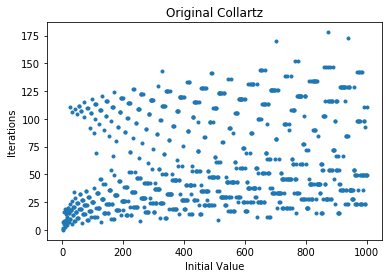

In [5]:
plt.scatter(initial_value, iteration_count, marker='.')
plt.xlabel('Initial Value')
plt.ylabel('Iterations')
plt.title('Original Collartz')
plt.show()

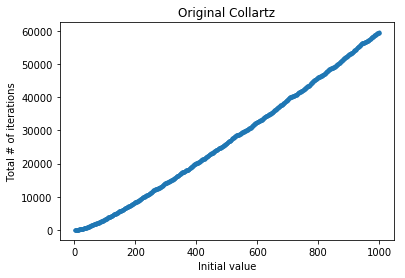

In [6]:
plt.scatter(initial_value, iteration_accum, marker='.')
plt.xlabel('Initial value')
plt.ylabel('Total # of iterations')
plt.title('Original Collartz')
plt.show()

Now, as the initial value is incremented from 1 to 1000 and passed to collartz(x), the value of x flucuates, and will often be end up being a value we have previosly passed as an initial value.  To reduce iteration steps, lets see what happens when we check if the value of x hits a value we already know will terminate. 

In [7]:
def collartz(x, checked_values):
    count = 0
    while x != 1:
        count += 1
        if x in checked_values:
            break
        if x % 2 == 0:
            x = x/2
        else:
            x = 3*x + 1
    return count    

In [8]:
initial_value = []
iteration_count = []
iteration_accum = []
for i in range(1000):
    iteration_count.append(collartz(i+1, initial_value))
    iteration_accum.append(sum(iteration_count))
    initial_value.append(i+1)

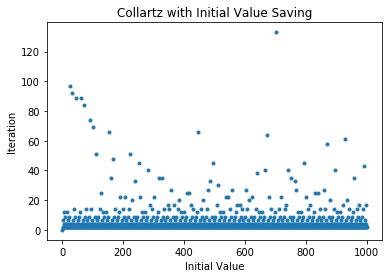

In [9]:
plt.scatter(initial_value, iteration_count, marker='.')
plt.xlabel('Initial Value')
plt.ylabel('Iteration')
plt.title('Collartz with Initial Value Saving')
plt.show()

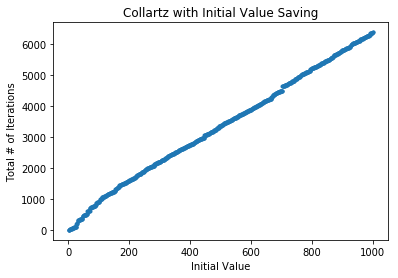

In [10]:
plt.scatter(initial_value, iteration_accum, marker='.')
plt.xlabel('Initial Value')
plt.ylabel('Total # of Iterations')
plt.title('Collartz with Initial Value Saving')
plt.show()

Now consider instread of only checking if the value of x is a number previosly given as the initial value,  lets check if that value for x has been computed and terminated previosly for any given initial value

In [11]:
def collartz(x, x_list):
    count = 0
    x_temp = []
    while x != 1:
        count += 1
        if x in x_list:
            break
        x_temp.append(x)
        if x % 2 == 0:
            x = x/2
        else:
            x = 3*x + 1
    return count, x_temp

In [12]:
initial_value = []
iteration_count = []
iteration_accum = []
x_list = []
for i in range(1000):
    temp_list = []
    count, temp_list = collartz(i+1, x_list)
    initial_value.append(i+1)
    iteration_count.append(count)
    iteration_accum.append(sum(iteration_count))
    x_list += temp_list

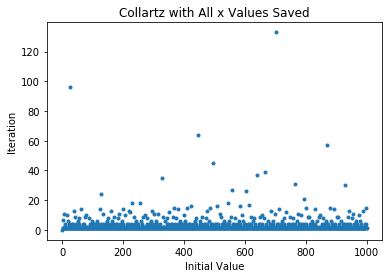

In [13]:
plt.scatter(initial_value, iteration_count, marker='.')
plt.xlabel('Initial Value')
plt.ylabel('Iteration')
plt.title('Collartz with All x Values Saved')
plt.show()

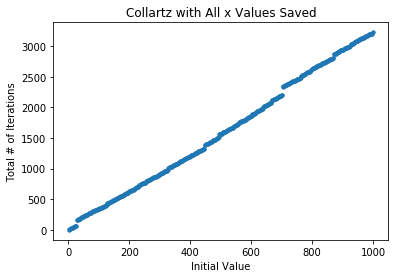

In [14]:
plt.scatter(initial_value, iteration_accum, marker='.')
plt.xlabel('Initial Value')
plt.ylabel('Total # of Iterations')
plt.title('Collartz with All x Values Saved')
plt.show()

### Changing Order of Outer Loop  
Let's see what happens when we change the way the outer loop iterated through initial values.  Consider iteating from 1000 down to 1.

In [15]:
initial_value = []
iteration_count = []
iteration_accum = []
x_list = []
for i in reversed(range(1000)):
    temp_list = []
    count, temp_list = collartz(i+1, x_list)
    initial_value.append(i+1)
    iteration_count.append(count)
    iteration_accum.append(sum(iteration_count))
    x_list += temp_list

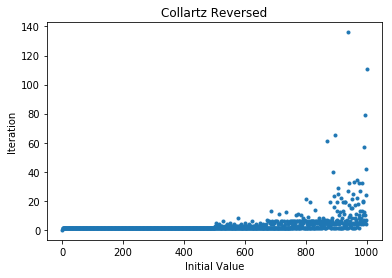

In [16]:
plt.scatter(initial_value, iteration_count, marker='.')
plt.xlabel('Initial Value')
plt.ylabel('Iteration')
plt.title('Collartz Reversed')
plt.show()

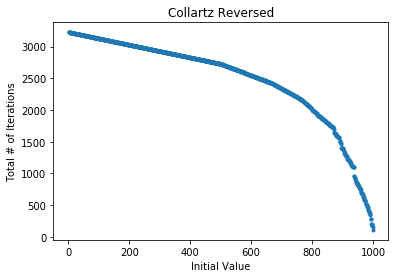

In [17]:
plt.scatter(initial_value, iteration_accum, marker='.')
plt.xlabel('Initial Value')
plt.ylabel('Total # of Iterations')
plt.title('Collartz Reversed')
plt.show()

### Upper Bound for x

In [18]:
initial_value = []
iteration_count = []
x_list = []
for i in range(1000):
    temp_list = []
    count, temp_list = collartz(i+1, x_list)
    initial_value.append(i+1)
    iteration_count.append(count)
    x_list += temp_list

In [19]:
print('Maximum value of x: ', max(x_list))

Maximum value of x:  250504.0


In [34]:
def upper_bound(n):
    initial_value = []
    iteration_count = []
    x_list = []
    for i in range(n):
        temp_list = []
        count, temp_list = collartz(i+1, x_list)
        x_list += temp_list
    return max(x_list)

Let's try a series of values for n, where we find the maximum value of x for each n.

In [35]:
n_list = []
x_max = []
for i in range(100):
    n_list.append(i+1)
    x_max.append(upper_bound(i+2))

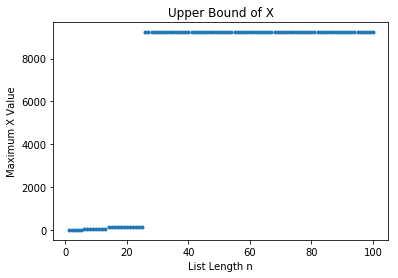

In [36]:
plt.scatter(n_list, x_max, marker='.')
plt.xlabel('List Length n')
plt.ylabel('Maximum X Value')
plt.title('Upper Bound of X')
plt.show()

In [37]:
print(x_max[60:65])

[9232.0, 9232.0, 9232.0, 9232.0, 9232.0]


In [38]:
n_list = []
x_max = []
for i in range(1000):
    n_list.append(i+1)
    x_max.append(upper_bound(i+2))

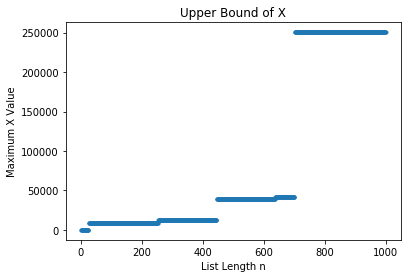

In [39]:
plt.scatter(n_list, x_max, marker='.')
plt.xlabel('List Length n')
plt.ylabel('Maximum X Value')
plt.title('Upper Bound of X')
plt.show()

### Convergence to 1

Let's see how the original collartz converges to the terminating value 1 when given small initial values.

In [45]:
def collartz(x):
    x_values = []
    count_num = []
    count = 0
    while x != 1:
        count += 1
        if x % 2 == 0:
            x = x/2
        else:
            x = 3*x + 1
        x_values.append(x)
        count_num.append(count)
    return count_num, x_values

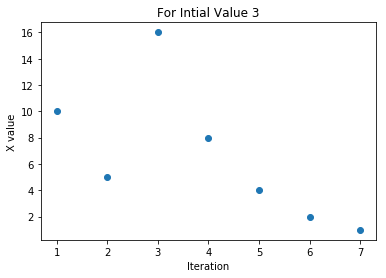

In [49]:
iteration, x_value = collartz(3)
plt.scatter(iteration, x_value)
plt.xlabel('Iteration')
plt.ylabel('X value')
plt.title('For Intial Value 3')
plt.show()

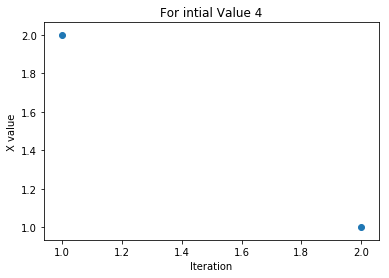

In [50]:
iteration, x_value = collartz(4)
plt.scatter(iteration, x_value)
plt.xlabel('Iteration')
plt.ylabel('X value')
plt.title('For Intial Value 4')
plt.show()

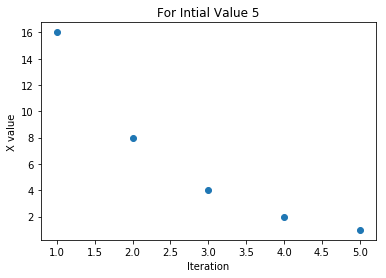

In [51]:
iteration, x_value = collartz(5)
plt.scatter(iteration, x_value)
plt.xlabel('Iteration')
plt.ylabel('X value')
plt.title('For Intial Value 5')
plt.show()

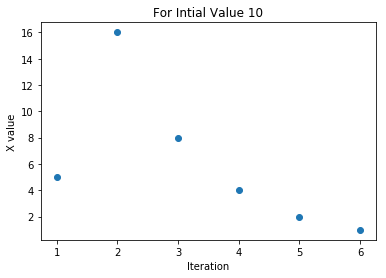

In [52]:
iteration, x_value = collartz(10)
plt.scatter(iteration, x_value)
plt.xlabel('Iteration')
plt.ylabel('X value')
plt.title('For Intial Value 10')
plt.show()

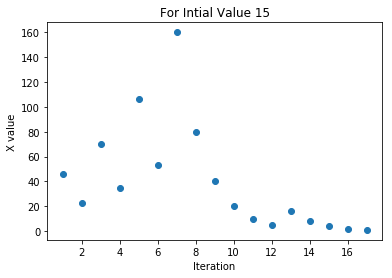

In [54]:
iteration, x_value = collartz(15)
plt.scatter(iteration, x_value)
plt.xlabel('Iteration')
plt.ylabel('X value')
plt.title('For Intial Value 15')
plt.show()